In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import feature_engine.selection as fes
from sklearn.feature_selection import chi2, RFE, mutual_info_classif, SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel, mutual_info_regression, f_regression, f_classif, SequentialFeatureSelector
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.linear_model import Lasso, LogisticRegression
from BorutaShap import BorutaShap
from featurewiz import FeatureWiz
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows',400)

In [2]:
data = pd.read_csv('santander_train.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
data.isnull().mean()

ID                               0.0
var3                             0.0
var15                            0.0
imp_ent_var16_ult1               0.0
imp_op_var39_comer_ult1          0.0
imp_op_var39_comer_ult3          0.0
imp_op_var40_comer_ult1          0.0
imp_op_var40_comer_ult3          0.0
imp_op_var40_efect_ult1          0.0
imp_op_var40_efect_ult3          0.0
imp_op_var40_ult1                0.0
imp_op_var41_comer_ult1          0.0
imp_op_var41_comer_ult3          0.0
imp_op_var41_efect_ult1          0.0
imp_op_var41_efect_ult3          0.0
imp_op_var41_ult1                0.0
imp_op_var39_efect_ult1          0.0
imp_op_var39_efect_ult3          0.0
imp_op_var39_ult1                0.0
imp_sal_var16_ult1               0.0
ind_var1_0                       0.0
ind_var1                         0.0
ind_var2_0                       0.0
ind_var2                         0.0
ind_var5_0                       0.0
ind_var5                         0.0
ind_var6_0                       0.0
i

In [4]:
data.nunique()

ID                               76020
var3                               208
var15                              100
imp_ent_var16_ult1                 596
imp_op_var39_comer_ult1           7551
imp_op_var39_comer_ult3           9099
imp_op_var40_comer_ult1            293
imp_op_var40_comer_ult3            346
imp_op_var40_efect_ult1             23
imp_op_var40_efect_ult3             29
imp_op_var40_ult1                  224
imp_op_var41_comer_ult1           7421
imp_op_var41_comer_ult3           8961
imp_op_var41_efect_ult1            331
imp_op_var41_efect_ult3            454
imp_op_var41_ult1                 8032
imp_op_var39_efect_ult1            336
imp_op_var39_efect_ult3            462
imp_op_var39_ult1                 8149
imp_sal_var16_ult1                  66
ind_var1_0                           2
ind_var1                             2
ind_var2_0                           1
ind_var2                             1
ind_var5_0                           2
ind_var5                 

In [5]:
numerical_columns = []
categorical_columns = []
for column in data.columns:
    if data[column].dtype == float:
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)

In [6]:
# Classification problem
X = data.drop('TARGET',axis=1)
y = data['TARGET']
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [7]:
# Regression Problem
reg_data = load_diabetes()
reg_X = pd.DataFrame(reg_data['data'], columns=reg_data['feature_names'])
reg_y = pd.Series(reg_data['target'])

# Feature Selection (Supervised)

After feature engineering, feature selection involves selecting a set of features that are most significant for predicting target variable. Feature selection reduces the risk of curse of dimensionality, as having too many features may result in a worse performance on machine learning models.

These are the following most common feature selection techniques available:

1. <b>Filter methods</b> : Identify relationship between features and the target variable to compute the importance of features.
- Variance Threshold
- Pearson/Spearman Correlation
- Mutual Information
- Chi-Square (Classification only)
- F-test (ANOVA)

2. <b>Wrapper methods</b> : Generate models with a subsets of feature and commpare their model performances.
- Recursive Feature Elimination
- BorutaShap
- Forward Feature Selection
- Backward Feature Selection
- Exhaustive Feature Selection

3. <b>Embedded methods</b> : Using machine learning models to identify feature importance/coefficient importance
- Extra Trees
- Lasso Regression
- Logistic Regression with Lasso penalty (l1)

4. <b>Hybrid methods</b> : Combination of filter and wrapper methods
- FeatureWiz (Pearson correlation + RFE using XGBoost)

<i>Note that more details about machine learning algorithms for embedded methods will be covered in Machine Learning section.</i>

Mutual information, chi-square and F-test methods usually require the use of either <b>SelectKBest or SelectPercentile</b> methods during feature selection. Meanwhile, extra trees classifier usually require the use of <b>SelectFromModel</b> methods during feature selection.

Determining the most suitable number of features to select requires trial and error by comparing model performance for different number of features selected.



## Filter Methods

Filter methods involve performing various statistical test to determine most important features to use for model prediction.

Advantages: Fast to compute on larger datasets

Disadvantage: Less accurate compared to other types of methods.

### Variance Threshold

Variance threshold method by default removes features with zero variance.

Features with constant variance can most certainly be eliminated prior to training on machine learning algorithms.

In [8]:
selector = fes.DropConstantFeatures(tol=1)
data_selection = selector.fit_transform(X)
len(data_selection.columns)

336

### Pearson/Spearman Correlation

Independent features that have very strong positive correlation with each other can be removed (one of it) from the dataset to reduce the risk of multicollinearity.

By default, Pearson correlation method is used with a threshold of 0.8.

In [9]:
selector = fes.DropCorrelatedFeatures(method='pearson',threshold=0.8)
data_selection = selector.fit_transform(X)
len(data_selection.columns)

174

### Mutual Information (Classification)

Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. 

It is equal to zero if and only if two random variables are independent, and higher values indicate higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Formula for mutual information:

<b>I(X;Y) = H(X) - H(X|Y)</b>

I(X;Y) : Mutual information for X and Y

H(X) : Entropy for X

H(X|Y) : Conditional entropy for X given Y

Note that mutual information captures all types of dependency (both linear and non-linear)

<i>More details about entropy will be covered in decision trees algorithm (Machine Learning) section.</i>

In [10]:
selector = SelectKBest(mutual_info_classif,k=10)
selector.fit(X,y)
columns_selected = X.columns[selector.get_support()]
columns_selected

Index(['ind_var5_0', 'ind_var5', 'ind_var30_0', 'ind_var30', 'ind_var39_0',
       'num_var4', 'num_var5', 'num_var30', 'num_var42',
       'num_meses_var5_ult3'],
      dtype='object')

In [11]:
result = pd.Series(selector.scores_, index= X.columns)
result.sort_values(ascending=False).head(20)

num_var30                   0.019767
num_var42                   0.019314
ind_var30                   0.019079
num_var5                    0.017895
num_meses_var5_ult3         0.017319
ind_var30_0                 0.016592
ind_var5                    0.016160
ind_var39_0                 0.015525
num_var4                    0.015484
ind_var5_0                  0.015399
num_var35                   0.014649
saldo_var30                 0.014584
var15                       0.014099
num_var5_0                  0.013697
ind_var41_0                 0.012968
num_var41_0                 0.012714
num_meses_var39_vig_ult3    0.012295
num_var42_0                 0.012244
num_var30_0                 0.012128
num_var39_0                 0.011894
dtype: float64

### Chi Square

Chi square method for feature selection is used to identify dependence of non-negative features with class target variable (for Classification problems). The higher the chi-square test statistic, the greater the importance of the feature for predicting target variable.

In [12]:
X_abs = X.abs()
selector = SelectKBest(score_func=chi2,k=10)
selector.fit(X_abs,y)
columns_selected = X_abs.columns[selector.get_support()]
columns_selected

Index(['delta_imp_aport_var13_1y3', 'delta_imp_aport_var17_1y3',
       'delta_imp_compra_var44_1y3', 'delta_imp_trasp_var33_in_1y3',
       'delta_imp_venta_var44_1y3', 'delta_num_aport_var13_1y3',
       'delta_num_aport_var17_1y3', 'delta_num_compra_var44_1y3',
       'delta_num_trasp_var33_in_1y3', 'delta_num_venta_var44_1y3'],
      dtype='object')

In [13]:
result = pd.Series(selector.scores_, index=X_abs.columns)
result.sort_values(ascending=False).head(10)

delta_imp_aport_var13_1y3       5.309399e+10
delta_num_aport_var13_1y3       5.309399e+10
delta_num_venta_var44_1y3       1.730346e+10
delta_imp_venta_var44_1y3       1.730346e+10
delta_imp_compra_var44_1y3      2.227607e+09
delta_num_compra_var44_1y3      2.227607e+09
delta_imp_trasp_var33_in_1y3    2.059935e+09
delta_num_trasp_var33_in_1y3    2.059935e+09
delta_imp_aport_var17_1y3       1.990651e+09
delta_num_aport_var17_1y3       1.990651e+09
dtype: float64

### F-test (Classification)

F-test method for feature selection is used to compare between different models to check for significance in difference. The higher the F test statistic, the greater the importance of the feature for predicting target variable.

In [14]:
selector = SelectKBest(score_func=f_classif,k=10)
selector.fit(X,y)
columns_selected = X.columns[selector.get_support()]
columns_selected

Index(['var15', 'ind_var5', 'ind_var30', 'num_var4', 'num_var5', 'num_var30',
       'num_var35', 'num_var42', 'var36', 'num_meses_var5_ult3'],
      dtype='object')

In [15]:
result = pd.Series(selector.scores_, index=X.columns)
result.sort_values(ascending=False).head(10)

ind_var30              1745.255659
num_meses_var5_ult3    1708.340128
num_var30              1482.100843
num_var42              1425.940751
ind_var5               1418.577470
num_var5               1391.949523
var36                   813.832521
var15                   788.508493
num_var4                492.037964
num_var35               451.888800
dtype: float64

### Mutual Information (Regression)

Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. 

It is equal to zero if and only if two random variables are independent, and higher values indicate higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Formula for mutual information:

<b>I(X;Y) = H(X) - H(X|Y)</b>

I(X;Y) : Mutual information for X and Y

H(X) : Entropy for X

H(X|Y) : Conditional entropy for X given Y

Note that mutual information captures all types of dependency (both linear and non-linear)

In [16]:
selector = SelectKBest(mutual_info_regression,k=5)
selector.fit(reg_X,reg_y)
columns_selected = reg_X.columns[selector.get_support()]
columns_selected

Index(['bmi', 's1', 's4', 's5', 's6'], dtype='object')

In [17]:
result = pd.Series(selector.scores_, index= reg_X.columns)
result.sort_values(ascending=False)

bmi    0.175401
s5     0.147345
s6     0.105123
s4     0.096733
s1     0.070054
s3     0.069579
bp     0.064025
sex    0.027889
s2     0.010767
age    0.000000
dtype: float64

### F-test (Regression)

F-test method for feature selection is used to compare between different models to check for significance in difference. The higher the F test statistic, the greater the importance of the feature for predicting target variable.

In [18]:
selector = SelectKBest(score_func=f_regression,k=5)
selector.fit(reg_X,reg_y)
columns_selected = reg_X.columns[selector.get_support()]
columns_selected

Index(['bmi', 'bp', 's3', 's4', 's5'], dtype='object')

In [19]:
result = pd.Series(selector.scores_, index=reg_X.columns)
result.sort_values(ascending=False)

bmi    230.653764
s5     207.271194
bp     106.520131
s4     100.069264
s3      81.239659
s6      75.399683
s1      20.710567
age     16.101374
s2      13.746079
sex      0.817423
dtype: float64

## Wrapper Methods

Wrapper methods evaluate all possible combinations of features and select the combination that produces the best result for specific machine learning algorithms:

Advantage:
- More accurate than filter methods, given all possible combinations of features are considered

Disadvantage: 
- Computationally expensive for very large feature sets
- Features selected may vary between different machine learning algorithms

### Recursive Feature Elimination

The purpose of recursive feature elimination is to select features by recursively considering smaller sets of features.

At first, the estimator is trained on the initial set of features and the importance of each feature is obtained through specific attributes. Then, the least important features are removed from the current set of features and the process is repeated until the desired number of features to select is eventually reached.

In [20]:
selector = ExtraTreesRegressor()
rfe = RFE(selector, n_features_to_select=5)
rfe.fit(reg_X, reg_y)

RFE(estimator=ExtraTreesRegressor(), n_features_to_select=5)

In [21]:
reg_X.columns[rfe.support_]

Index(['bmi', 'bp', 's4', 's5', 's6'], dtype='object')

### Sequential Feature Selection (Forwards Selection)

Sequential feature selector provides two option of either forward or backward selection to form a subset of features in a greedy fashion with cross validation.

For forwards selection, the estimator is trained on individual features and the importance of each feature is obtained. Then, the most important feature is selected from the current set of features and the process is repeated for remaining features until the desired number of features is eventually reached.

In [22]:
selector = ExtraTreesRegressor()
sfs = SequentialFeatureSelector(selector, n_features_to_select=5)
rfe.fit(reg_X, reg_y)

RFE(estimator=ExtraTreesRegressor(), n_features_to_select=5)

In [23]:
reg_X.columns[rfe.support_]

Index(['bmi', 'bp', 's4', 's5', 's6'], dtype='object')

### BorutaShap

BorutaShap is an advanced feature selection method that relies on two main principles: <b>Shadow features and binomial distribution.</b> 

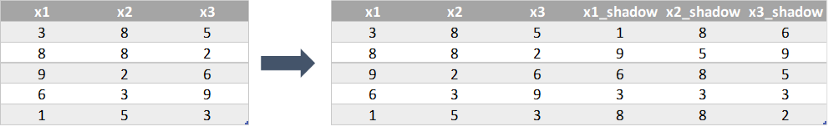

Using shadow features (features that have been shuffled), BorutaShap selects features based on feature importance that perform better than given threshold (highest feature importance score among shadow features).

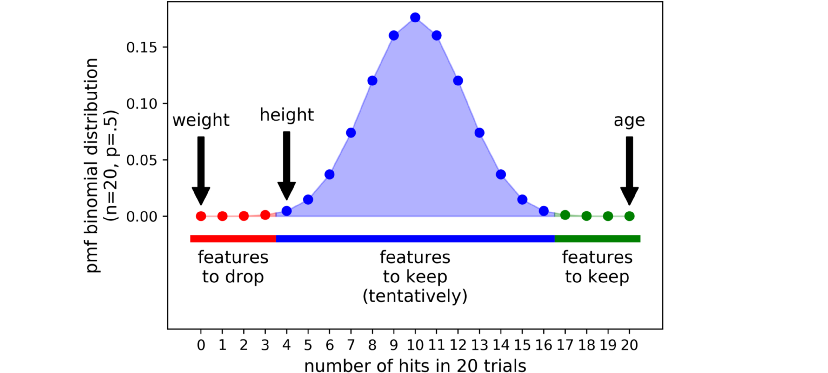

Since single run of feature selection is not sufficient, repeated iterations based on binomial distribution (hit vs miss) is more reliable. 

From the example above, age feature has the highest number of iterations where this feature was selected, while weight feature has the lowest number of iterations where this feature was selected. Features that are at upper tail end of binomial distribution is considered as acceptance region, while features at lower tail end of binomial distribution is considered as rejection region. Features that have number of hits lie in between lower tail and upper tail of binomial distribution is considered as tentative region (uncertainty to accept or reject).

Note that it is advisable to accept features that belong to tentative region, unless increasing number of trials to better determine features to accept or reject that previously belong to tentative region.

In [24]:
borutashap = BorutaShap(importance_measure = 'shap', classification = False)
borutashap.fit(X = reg_X, y = reg_y, verbose = True)
print(borutashap.Subset().columns.tolist())

  0%|          | 0/20 [00:00<?, ?it/s]

4 attributes confirmed important: ['bp', 'bmi', 's5', 's3']
5 attributes confirmed unimportant: ['sex', 's2', 'age', 's1', 's4']
1 tentative attributes remains: ['s6']
['bp', 'bmi', 's5', 's3']


## Embedded Methods

Embedded methods is a combination of multiple machine learning models that have their own feature selection methods (i.e. feature importance or coefficient importance)

Embedded methods allow machine learning algorithms to be trained and perform feature selection simultaneously.

Advantages:
- Considers interaction of features like wrapper methods
- Faster computation than wrapper methods
- Higher accuracy than filter methods
- Much less prone to overfitting

Disadvantages: Features selected may vary between different machine learning algorithms

### Extra Trees Classifier

For tree-based algorithms like random forest or extra trees, these machine learning algorithms have special attribute that computes the importance of features (feature_importances_).

Seperate models are available for regression and classification problems for tree-based algorithms.

In [25]:
selector = ExtraTreesClassifier()
model = SelectFromModel(selector, prefit=False, max_features=10, threshold=None)
X_new = model.fit_transform(X,y)
X_subset = pd.DataFrame(X_new,columns = X.columns[model.get_support()])
X_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      76020 non-null  float64
 1   var15                   76020 non-null  float64
 2   num_var22_ult3          76020 non-null  float64
 3   num_var45_hace2         76020 non-null  float64
 4   num_var45_hace3         76020 non-null  float64
 5   num_var45_ult1          76020 non-null  float64
 6   num_var45_ult3          76020 non-null  float64
 7   saldo_medio_var5_hace3  76020 non-null  float64
 8   saldo_medio_var5_ult3   76020 non-null  float64
 9   var38                   76020 non-null  float64
dtypes: float64(10)
memory usage: 5.8 MB


### Logistic Regression (with l1 penalty)

Logistic regression is a classification algorithm that can be regularized using l1 penalty (Lasso), which shrinks coefficients to zero for less important features as a penalization of using features that contribute less to prediction of class target variables.

In [26]:
classifier = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
classifier.fit(X_scaled,y)
coef_result = pd.Series(np.abs(classifier.coef_[0]),index=X_scaled.columns)
coef_result.sort_values(ascending=False)

var38                            2.746108e+01
num_var22_ult3                   5.030777e+00
saldo_var5                       4.040883e+00
saldo_medio_var5_ult1            3.803855e+00
var15                            3.724586e+00
num_var42                        3.402146e+00
num_var22_ult1                   2.802422e+00
ind_var30_0                      2.747653e+00
saldo_var8                       2.666152e+00
ind_var13                        2.325979e+00
num_ent_var16_ult1               2.103189e+00
num_var43_recib_ult1             1.493347e+00
num_op_var39_efect_ult3          1.477054e+00
ind_var24                        1.445784e+00
ind_var31_0                      1.414471e+00
num_var45_ult3                   1.390427e+00
var3                             1.214275e+00
num_meses_var5_ult3              1.072810e+00
num_meses_var8_ult3              1.035361e+00
num_meses_var13_largo_ult3       1.024736e+00
num_var4                         9.704356e-01
ind_var30                        9

### Extra Trees Regressor

For tree-based algorithms like random forest or extra trees, these machine learning algorithms have special attribute that computes the importance of features (feature_importances_).

Seperate models are available for regression and classification problems for tree-based algorithms.

In [27]:
selector = ExtraTreesRegressor()
model = SelectFromModel(selector, prefit=False, max_features=None, threshold=0.05)
X_new = model.fit_transform(reg_X, reg_y)
X_subset = pd.DataFrame(X_new,columns = reg_X.columns[model.get_support()])
X_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   bmi     442 non-null    float64
 2   bp      442 non-null    float64
 3   s1      442 non-null    float64
 4   s2      442 non-null    float64
 5   s3      442 non-null    float64
 6   s4      442 non-null    float64
 7   s5      442 non-null    float64
 8   s6      442 non-null    float64
dtypes: float64(9)
memory usage: 31.2 KB


### Lasso Regression

Lasso regression is a regularized version of linear regression models, which shrinks coefficients to zero for less important features as a penalization of using features that contribute less to prediction of target variables.

<b>Note that for Lasso regression, coefficients of linear regression model needs to be scaled by standard deviation of individual features for consistent unit of measure when identifying feature importance for unscaled data.</b>

More details can be referred to the following link for a complete explanation of coefficient interpretation for linear regression models:

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#feature-importance-from-coefficients

In [28]:
regressor = Lasso()
regressor.fit(reg_X,reg_y)
coef_result = pd.Series(np.abs(regressor.coef_)*reg_X.std(axis=0),index=reg_X.columns)
coef_result.sort_values(ascending=False)

bmi    17.509708
s5     14.647877
bp      0.299946
age     0.000000
sex     0.000000
s1      0.000000
s2      0.000000
s3      0.000000
s4      0.000000
s6      0.000000
dtype: float64

## Hybrid Methods

Hybrid methods is a combination of both filter and wrapper methods. Hybrid methods can be customized by selecting predefined filter and wrapper methods. Filter method is used to generate feature ranking list, followed by using top k features to perform wrapper methods. This signficantly improves time complexity of wrapper methods.

One such existing hybrid method is using FeatureWiz library.

### FeatureWiz

FeatureWiz uses SULOV (Searching for Uncorrelated List of Variables) algorithm, which is based on MRMR (Minimum Redundancy Maximum Relevance) algorithm followed by Recursive XGBoost.

The steps of FeatureWiz algorithm is as follows:
1. Find all the pairs of highly correlated variables exceeding a correlation threshold (say absolute(0.7)).
2. Find their MIS score (Mutual Information Score) to the target variable.
3. Take each pair of correlated variables, then knock off the one with the lower MIS score.
4. Select all remaining variables in data set and the full data split into multiple train and validation sets.
5. Find top X features (could be 10) on train using valid for early stopping (to prevent over-fitting)
6. Repeat steps 4 and 5 for different train and validation sets 5 times.
7. Combine all selected unique features.

In [29]:
selector = FeatureWiz(verbose=0)
selector.fit(X, y)
print(selector.features)

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (76020, 371)
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single